In [1]:
# Import the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore, shapiro
import statsmodels.api as sm
from sklearn import datasets, linear_model, metrics
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.stats.diagnostic import het_breuschpagan
import scipy.stats as stats
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import copy
import missingno as msno
from sklearn.linear_model import Lasso
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Read the CSV file

house_sale_price=pd.read_csv('housing.csv')
house_sale_price

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
0,141,31770,OneFam,One_Story,Average,1960,Typical,1080,1656,0,1,0,3,1,2,-93.619754,42.054035,215000
1,80,11622,OneFam,One_Story,Above_Average,1961,Typical,882,896,0,1,0,2,1,0,-93.619756,42.053014,105000
2,81,14267,OneFam,One_Story,Above_Average,1958,Typical,1329,1329,0,1,1,3,1,0,-93.619387,42.052659,172000
3,93,11160,OneFam,One_Story,Average,1968,Typical,2110,2110,0,2,1,3,1,2,-93.617320,42.051245,244000
4,74,13830,OneFam,Two_Story,Average,1997,Typical,928,928,701,2,1,3,1,1,-93.638933,42.060899,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,37,7937,OneFam,SLvl,Above_Average,1984,Typical,1003,1003,0,1,0,3,1,0,-93.604776,41.988964,142500
2409,0,8885,OneFam,One_Story,Average,1983,Typical,864,902,0,1,0,2,1,0,-93.602680,41.988314,131000
2410,62,10441,OneFam,SFoyer,Average,1992,Typical,912,970,0,1,0,3,1,0,-93.606847,41.986510,132000
2411,77,10010,OneFam,One_Story,Average,1974,Typical,1389,1389,0,1,0,2,1,1,-93.600190,41.990921,170000


## Exploratory Data Analysis

In [3]:
# Spliting the data into train and test

sale_train, sale_test = train_test_split(house_sale_price, test_size=0.2, random_state=22245863)

In [4]:
# datatype of various columns in the train data
#Fig.1 in report 

sale_train.dtypes

Lot_Frontage       int64
Lot_Area           int64
Bldg_Type         object
House_Style       object
Overall_Cond      object
Year_Built         int64
Exter_Cond        object
Total_Bsmt_SF      int64
First_Flr_SF       int64
Second_Flr_SF      int64
Full_Bath          int64
Half_Bath          int64
Bedroom_AbvGr      int64
Kitchen_AbvGr      int64
Fireplaces         int64
Longitude        float64
Latitude         float64
Sale_Price         int64
dtype: object

In [4]:
# Divide the columns among categorical and numerical data types

categorical = []
quantitative = []
for column in sale_train.columns:
    if sale_train[column].dtype == 'object':
        categorical.append(column)
    else:
        quantitative.append(column)

In [6]:
# Descriptive Statitics of train

sale_train.describe(exclude='O')

,Lot_Frontage,Lot_Area,Year_Built,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
count,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000
mean,55.507772,10031.868394,1969.012435,1018.719689,1132.592228,339.138860,1.531606,0.382383,2.854404,1.043005,0.600000,-93.642274,42.033521,175190.895855
std,33.193093,7484.327848,29.590410,413.642826,369.016046,422.428634,0.548608,0.501837,0.833490,0.207968,0.651672,0.026442,0.017918,71629.390795
min,0.000000,1300.000000,1872.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-93.693153,41.986498,35000.000000
25%,37.250000,7389.000000,1953.000000,784.000000,866.250000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,-93.661983,42.021586,129000.000000
50%,60.000000,9350.000000,1970.000000,966.500000,1056.500000,0.000000,2.000000,0.000000,3.000000,1.000000,1.000000,-93.640197,42.034520,157700.000000
75%,76.750000,11426.000000,1997.750000,1237.000000,1344.000000,703.000000,2.000000,1.000000,3.000000,1.000000,1.000000,-93.620951,42.047649,205712.500000
max,200.000000,164660.000000,2010.000000,3206.000000,3820.000000,1872.000000,4.000000,2.000000,6.000000,3.000000,4.000000,-93.577427,42.063381,755000.000000


In [7]:
# Checking if any NULL valued columns.

sale_train.isna().sum()

Lot_Frontage     0
Lot_Area         0
Bldg_Type        0
House_Style      0
Overall_Cond     0
Year_Built       0
Exter_Cond       0
Total_Bsmt_SF    0
First_Flr_SF     0
Second_Flr_SF    0
Full_Bath        0
Half_Bath        0
Bedroom_AbvGr    0
Kitchen_AbvGr    0
Fireplaces       0
Longitude        0
Latitude         0
Sale_Price       0
dtype: int64

In [8]:
# Count the duplicate rows

sale_train.duplicated().sum()

0

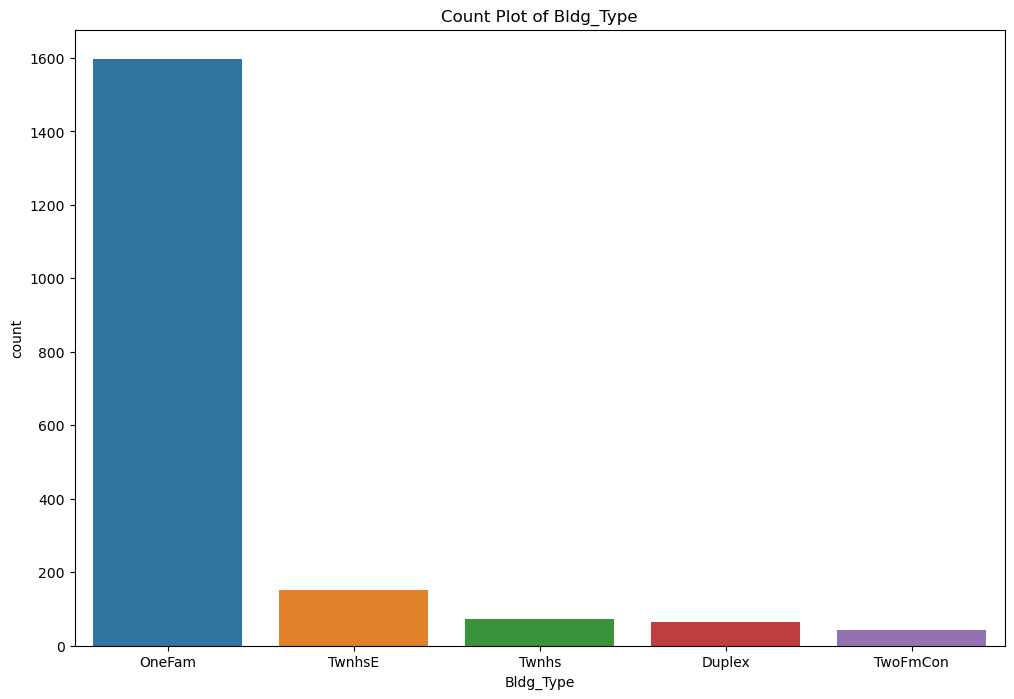

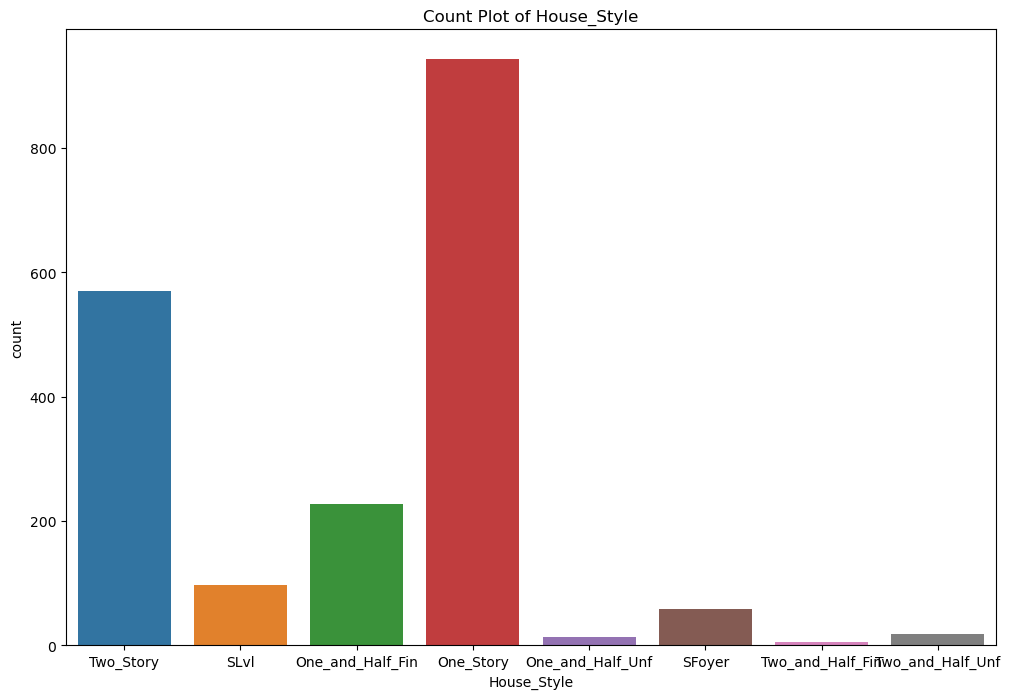

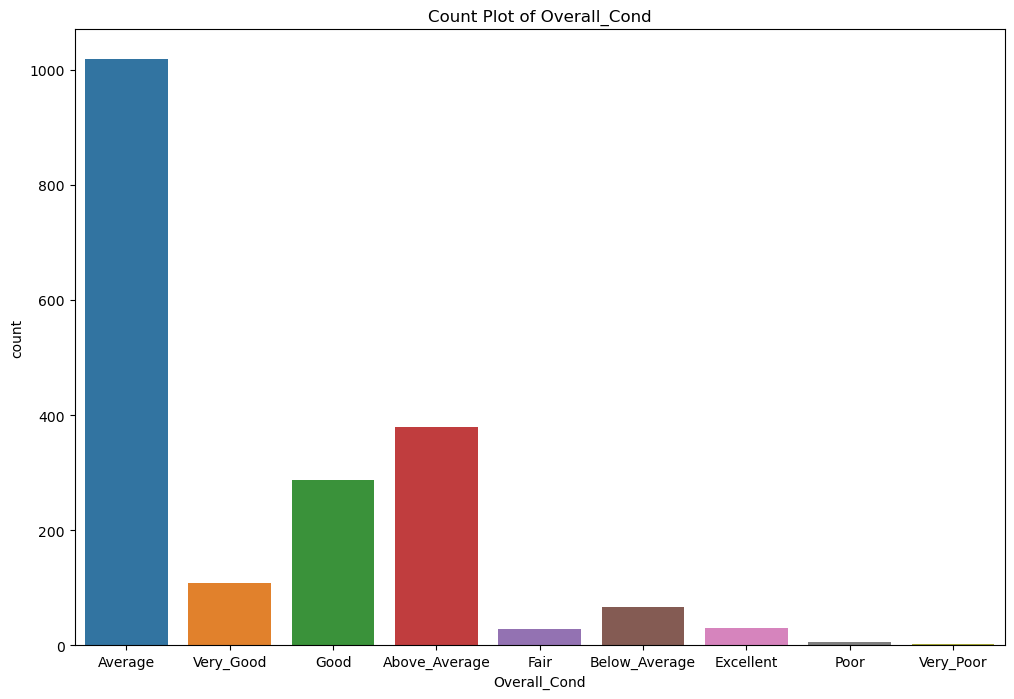

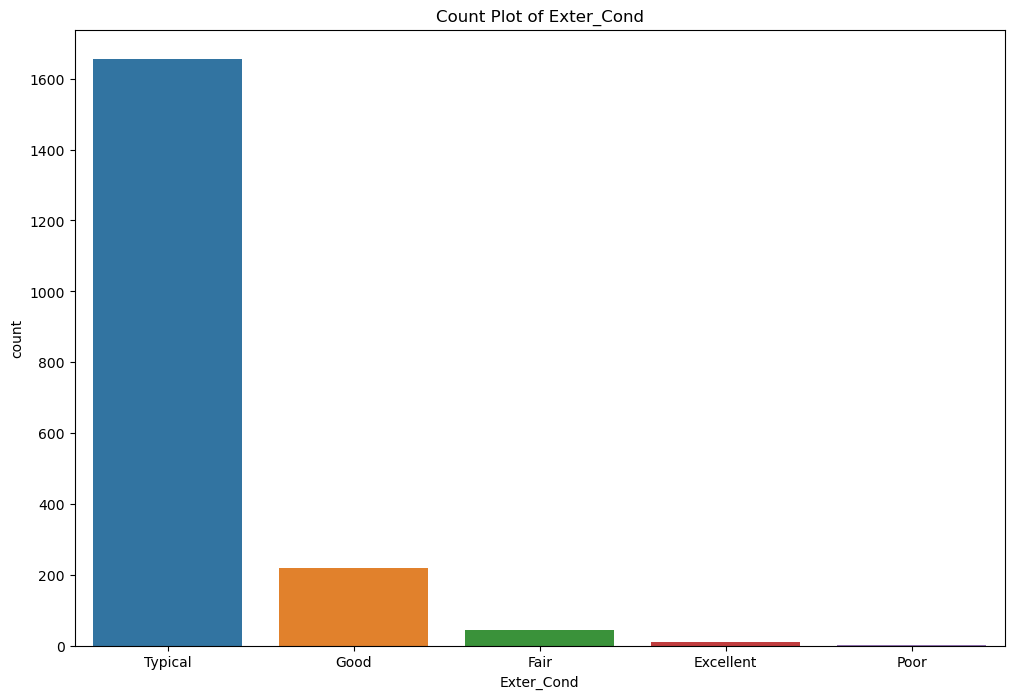

In [9]:
# countplot for categorical data
# Fig.3 and Fig.4 are from this resultant countplot in the report.

for column in categorical:
    plt.figure(figsize=(12, 8))
    sns.countplot(x = column, data = sale_train)
    ax = plt.gca()
    ax.set_title(f'Count Plot of {column}')
    plt.show()

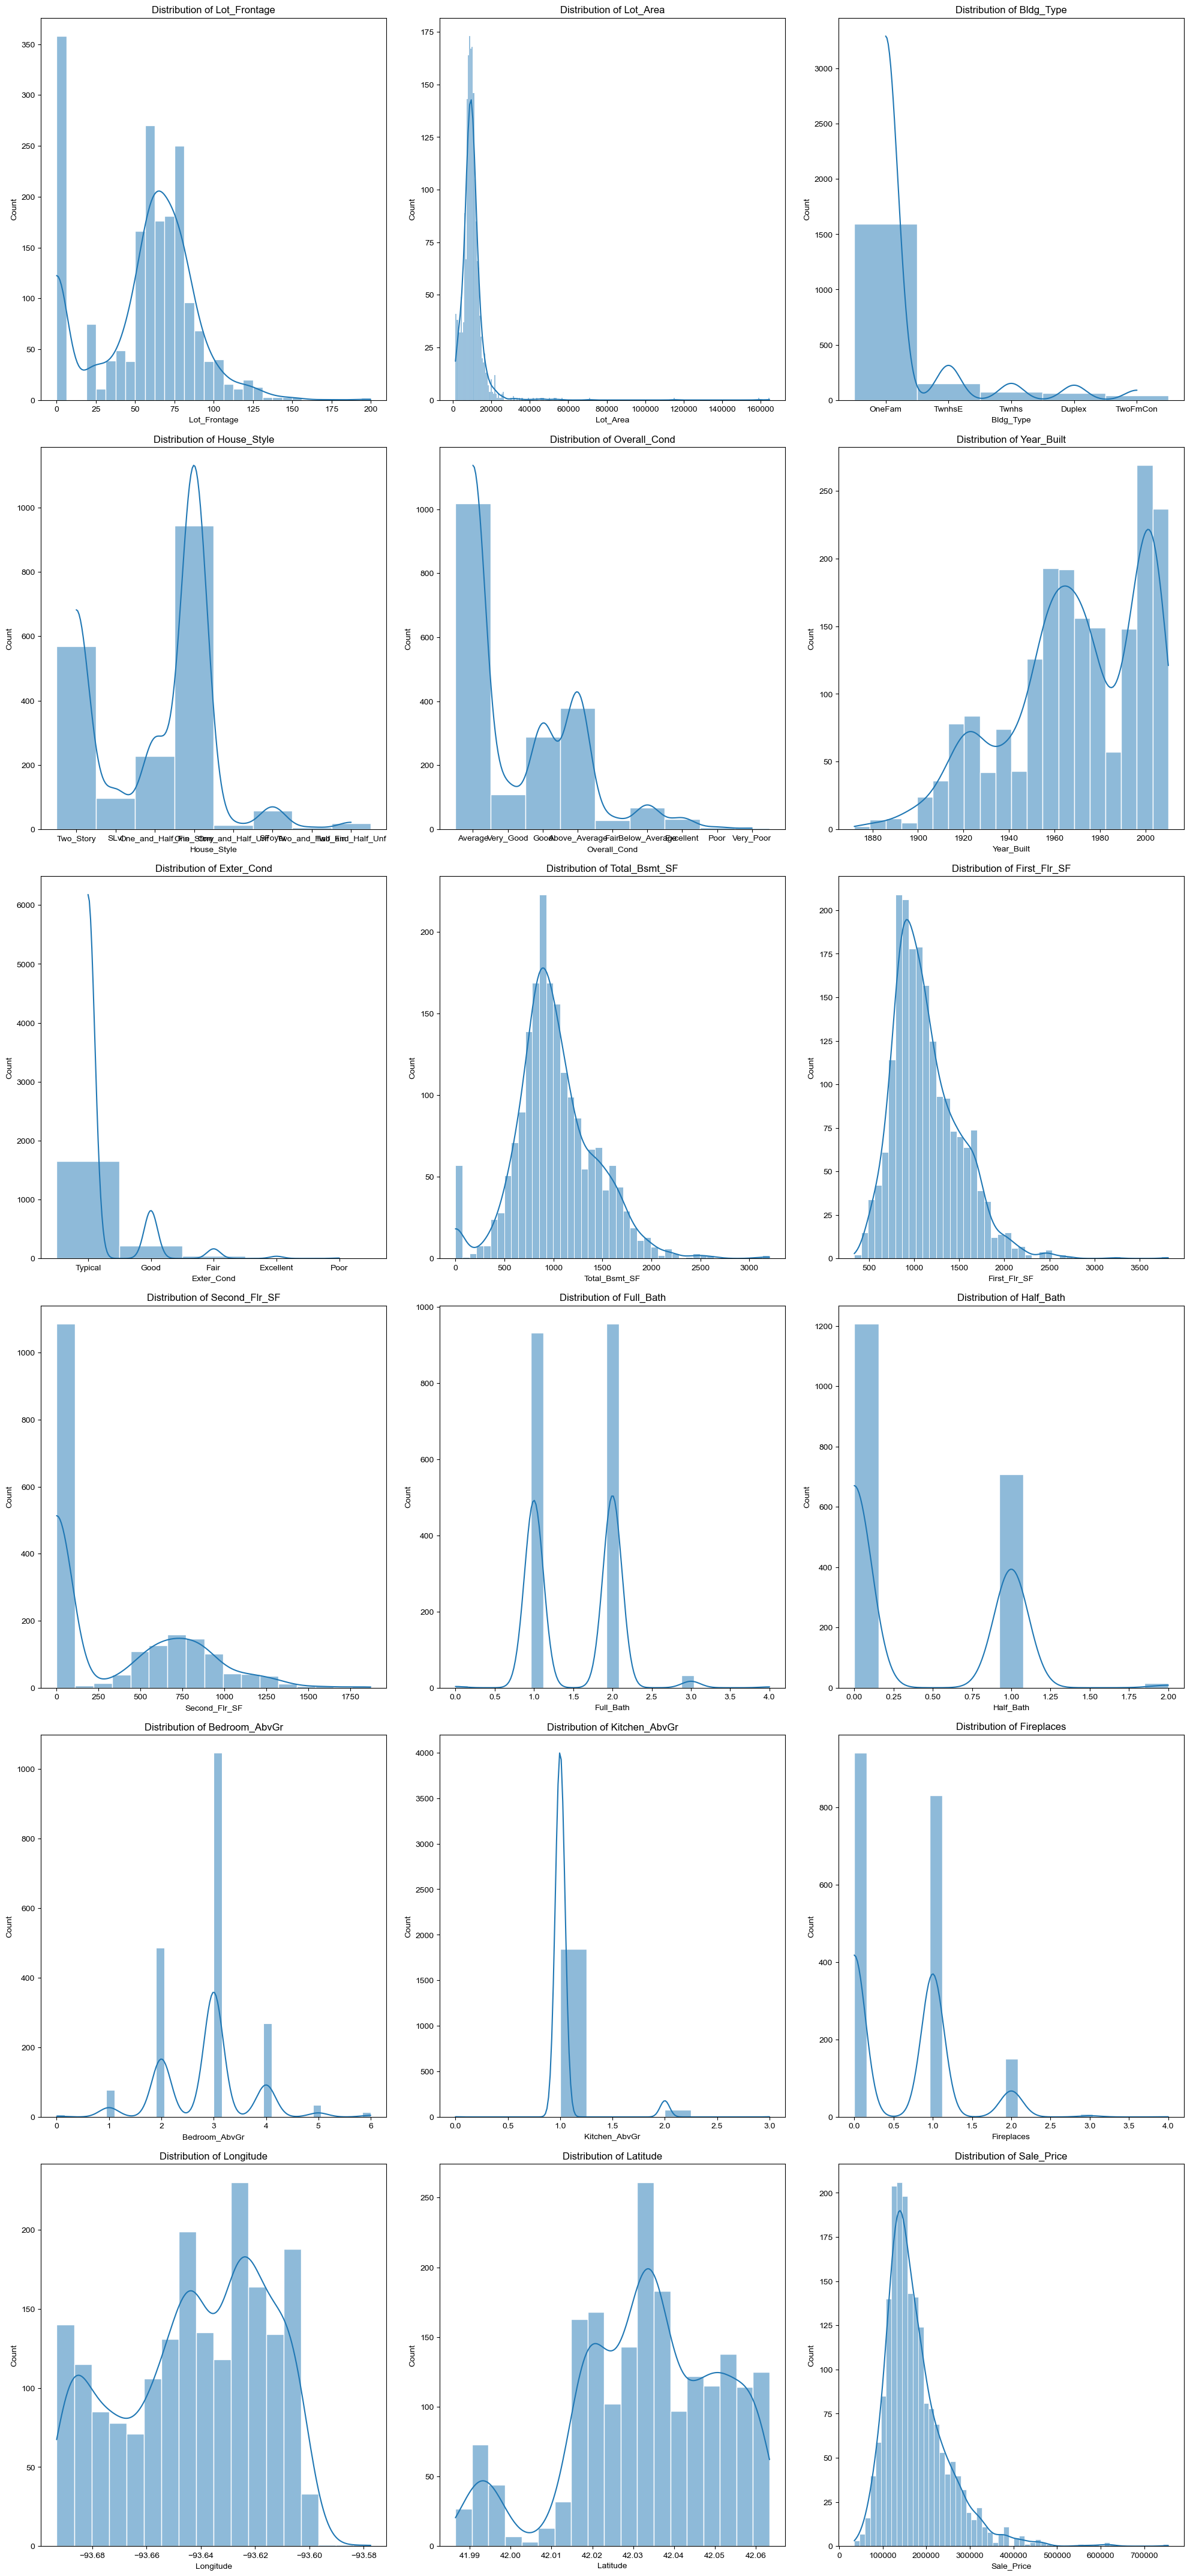

In [10]:
# Histogram for all columns in the train data
# fig.5, Fig.6 and Fig.7 in the report 

fig, axes = plt.subplots(21, 3, figsize=(20, 150))
for i, (column_name, column_data) in enumerate(sale_train.items()):
    sns.set(style="whitegrid")
    row = i // 3  
    col = i % 3   
    sns.histplot(column_data, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column_name}')
# Remove empty subplots, if any, and adjust layout
for i in range(len(sale_train.columns), len(axes.flat)):
    fig.delaxes(axes.flatten()[i])
plt.tight_layout()
plt.show()

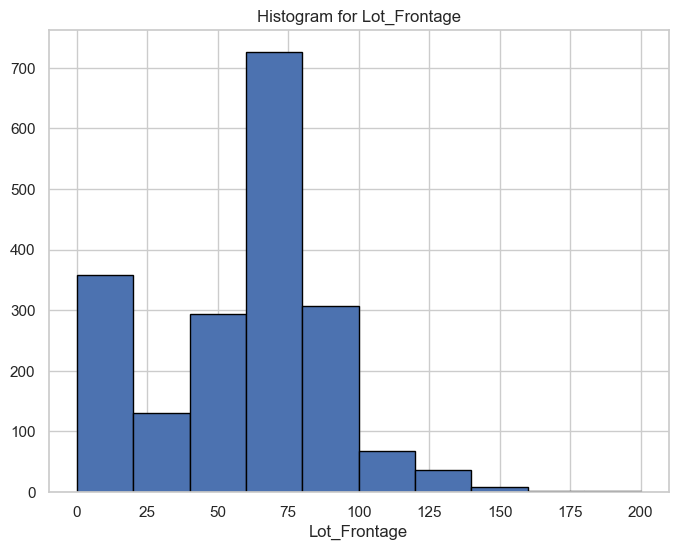

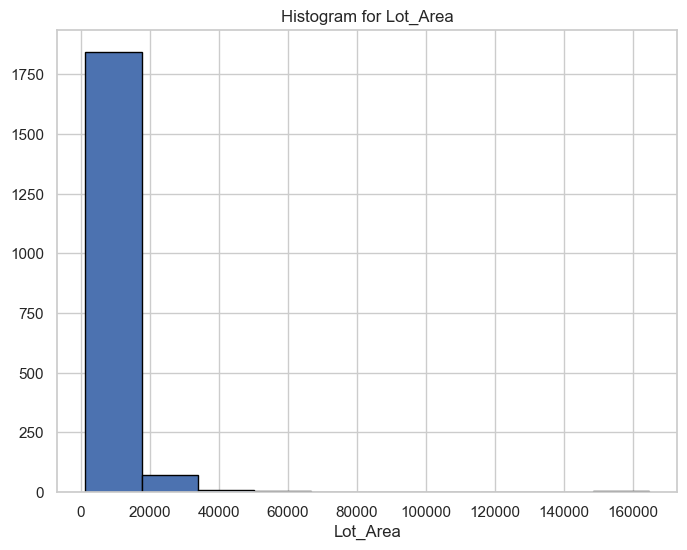

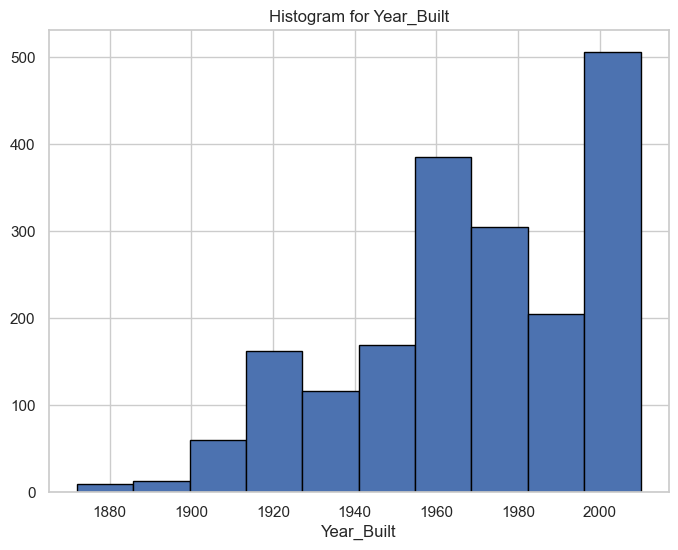

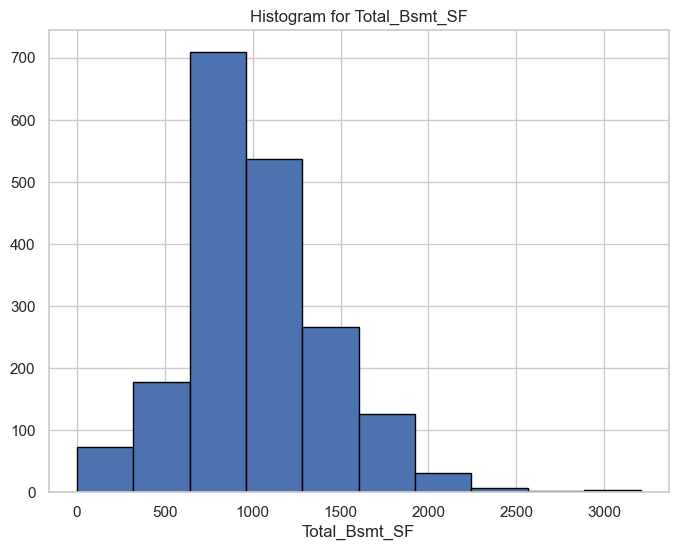

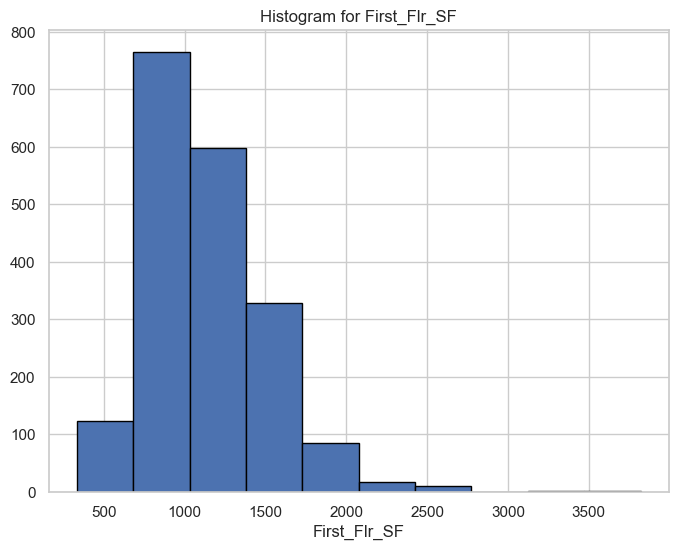

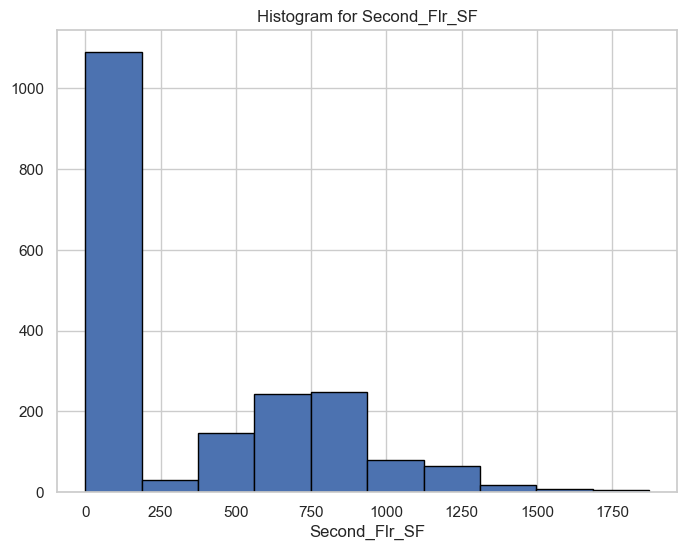

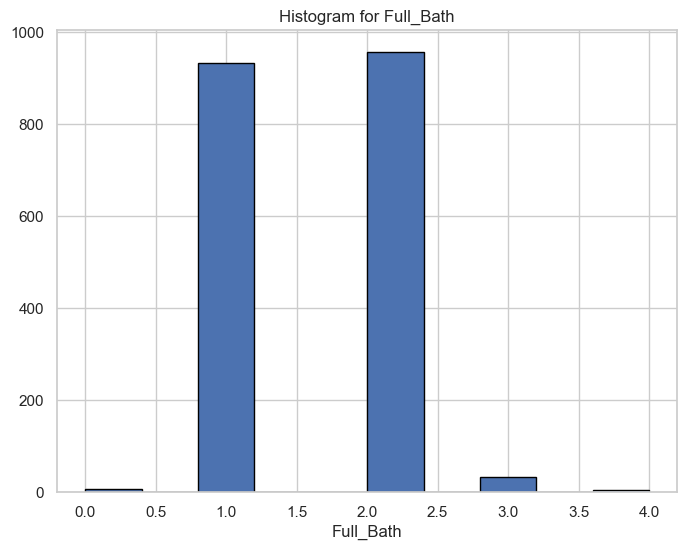

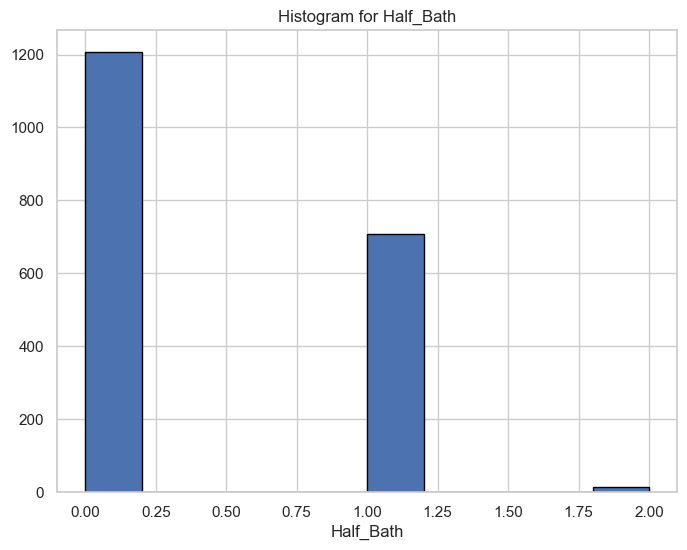

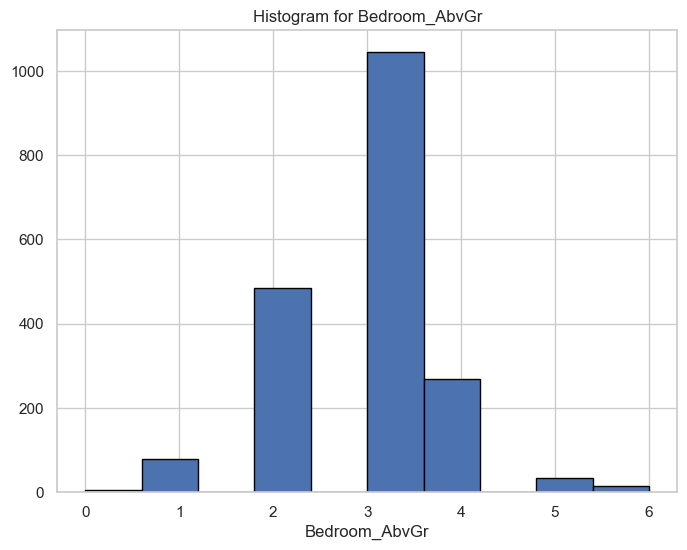

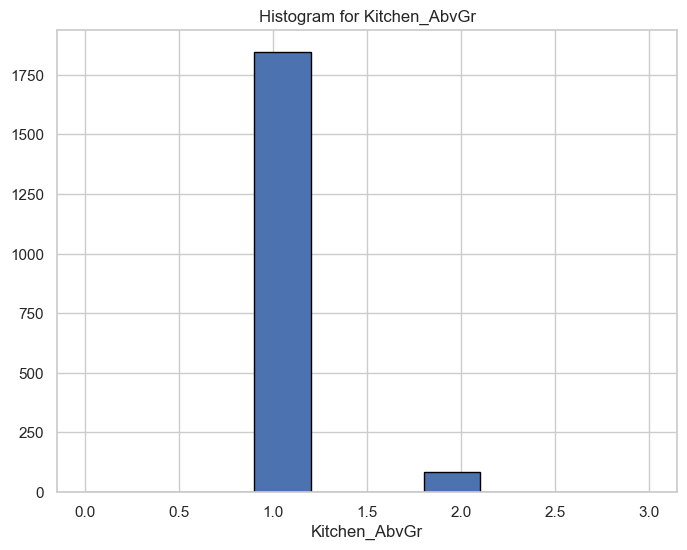

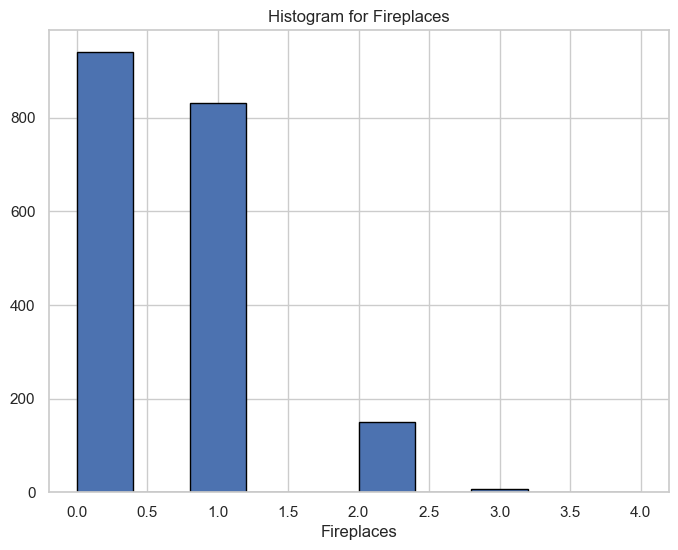

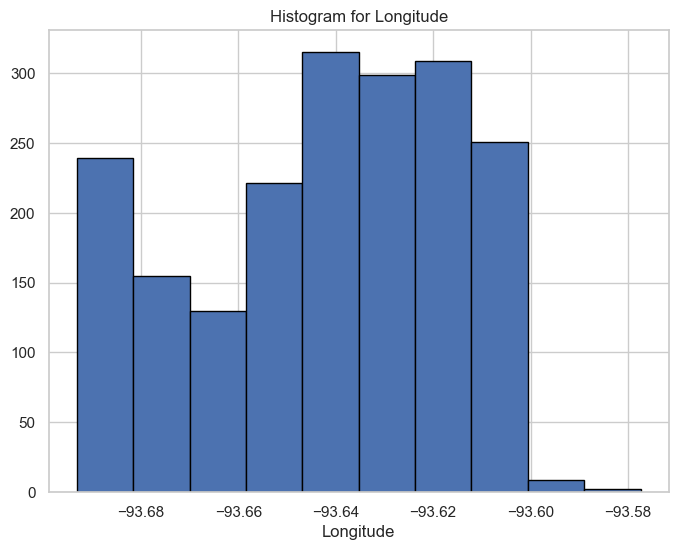

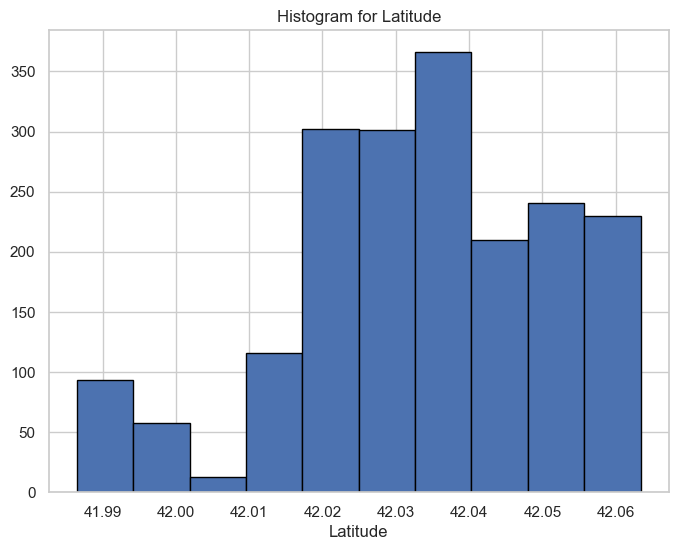

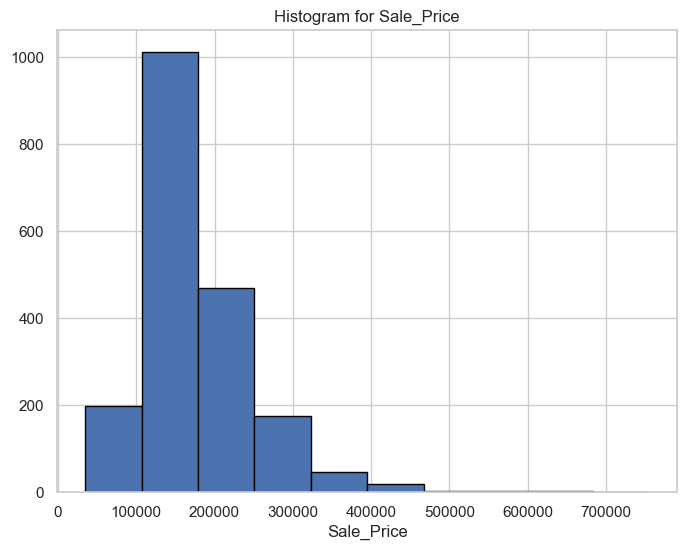

In [11]:
#Histogram for Numerical data

for column in quantitative:
    plt.figure(figsize=(8, 6))  
    plt.hist(sale_train[column], edgecolor='black') 
    plt.title(f'Histogram for {column}')  
    plt.xlabel(column)  

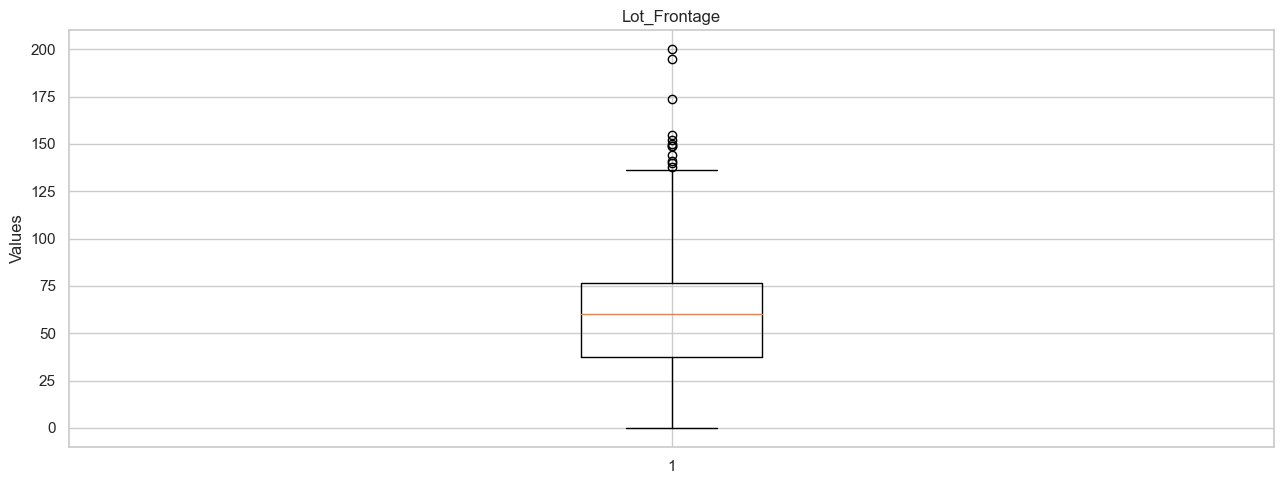

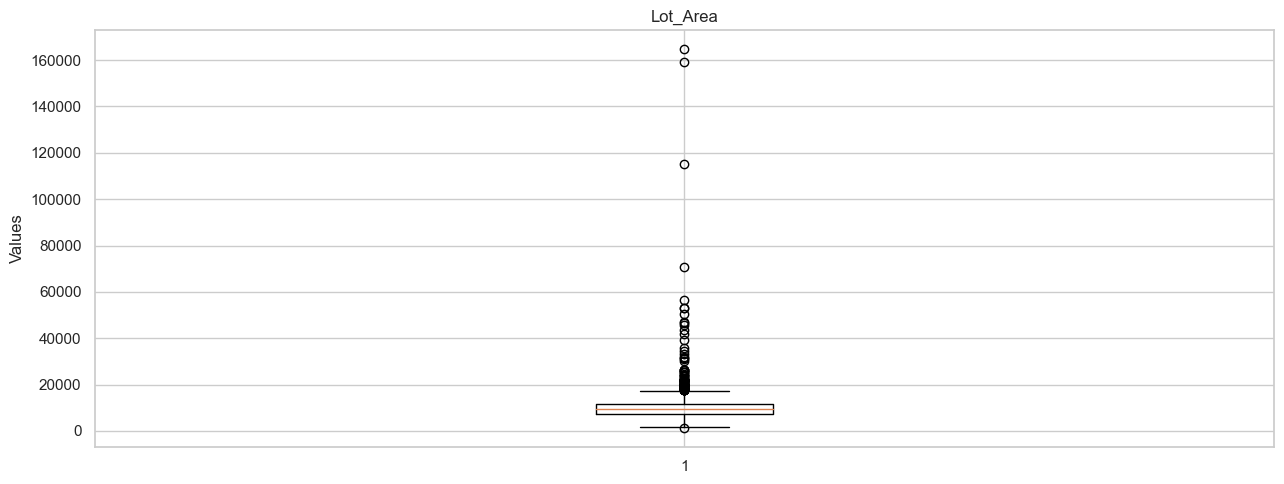

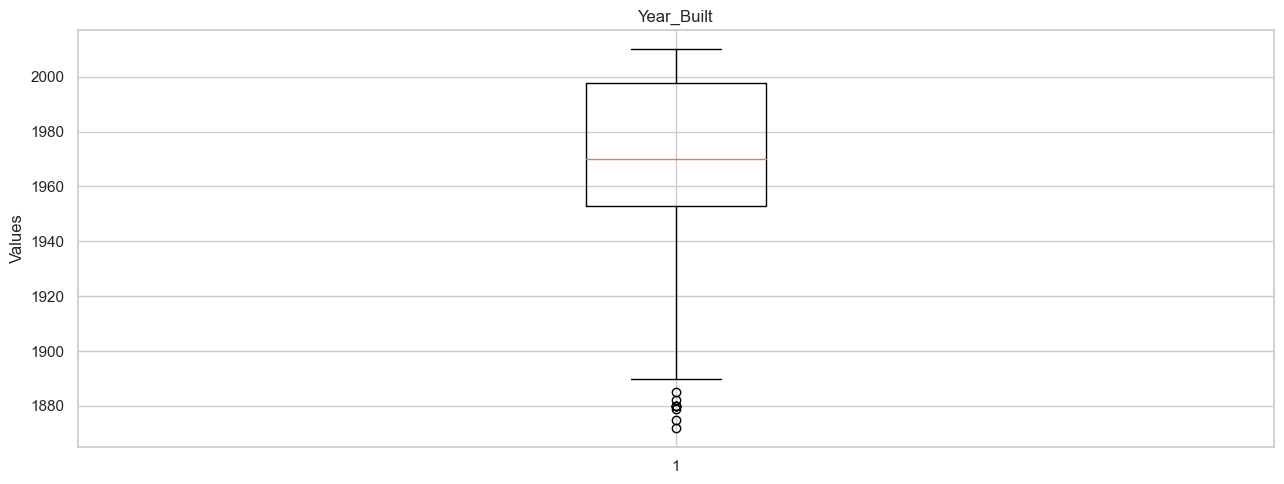

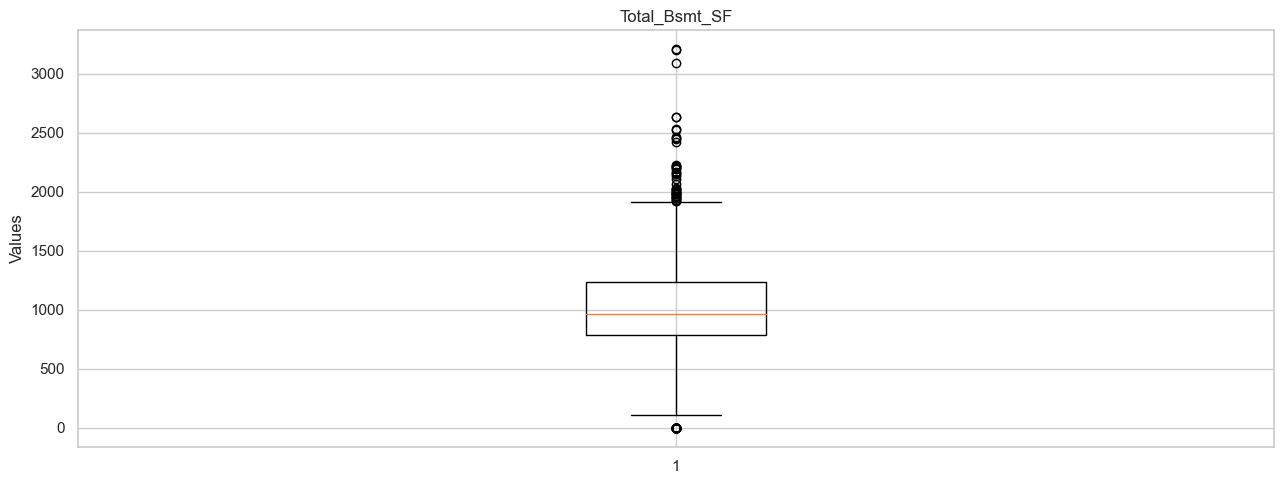

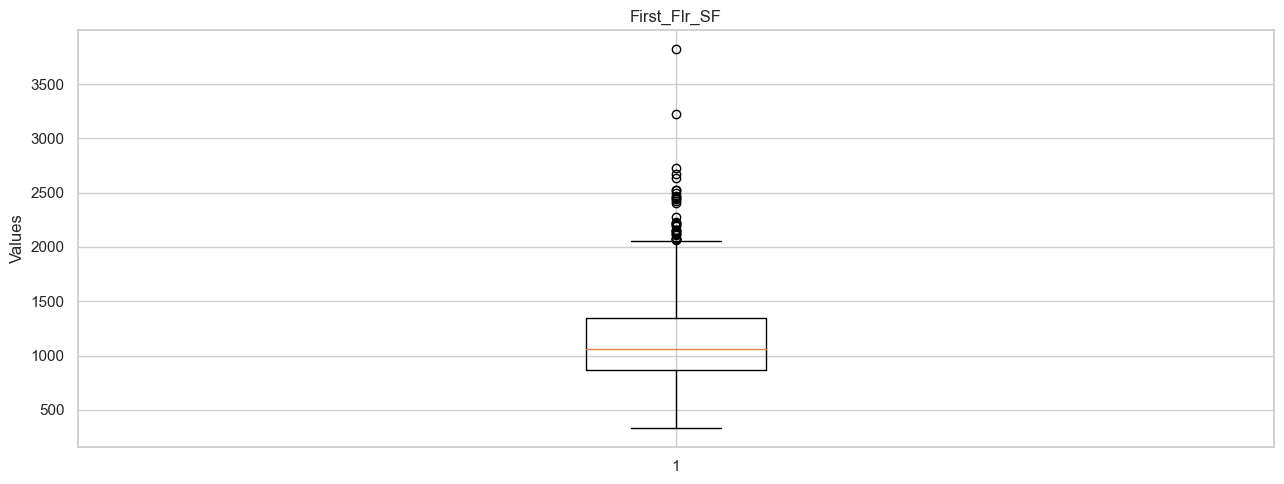

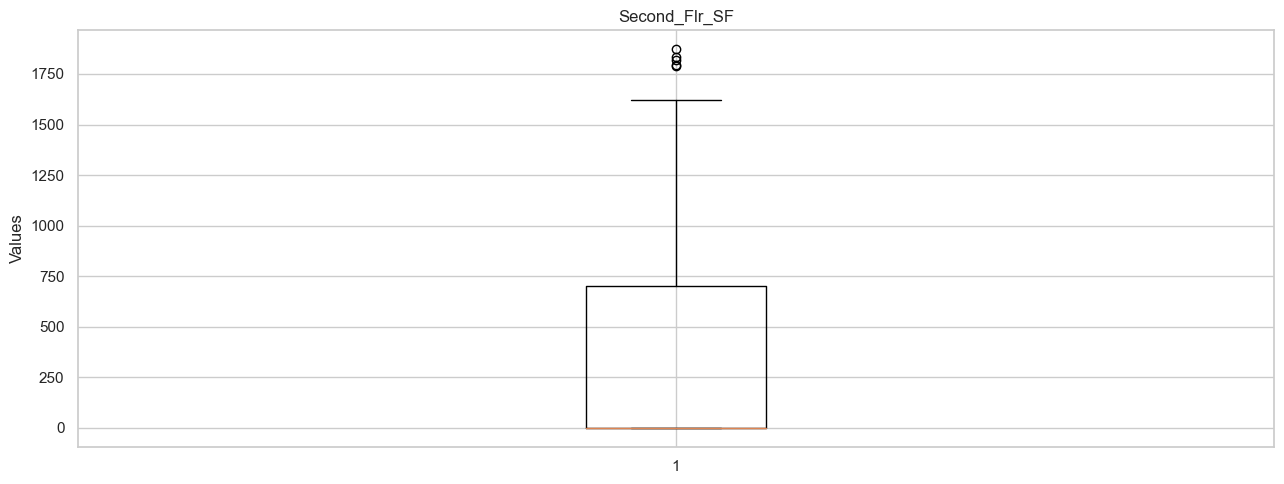

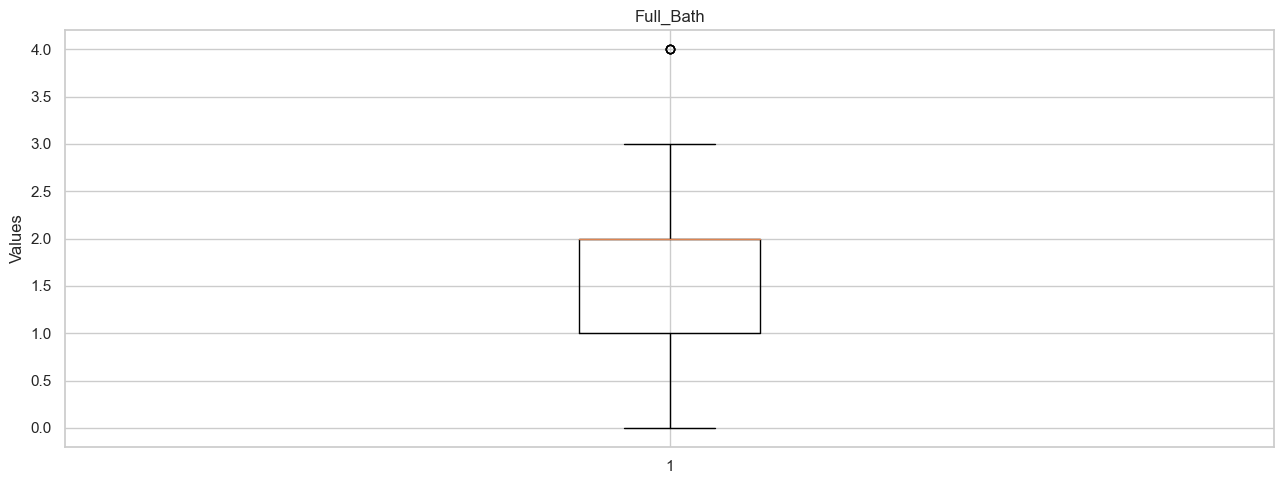

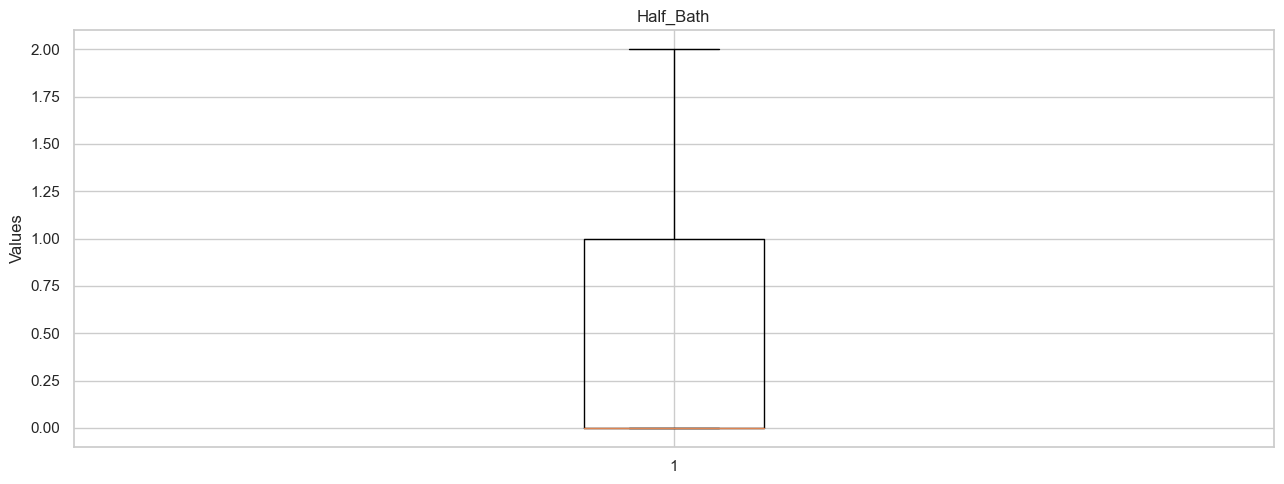

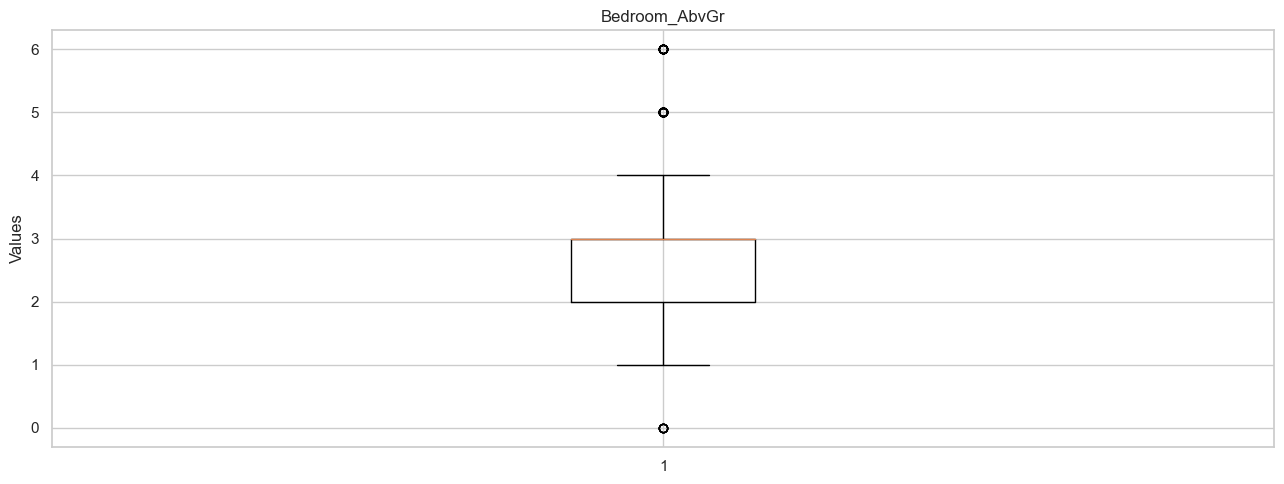

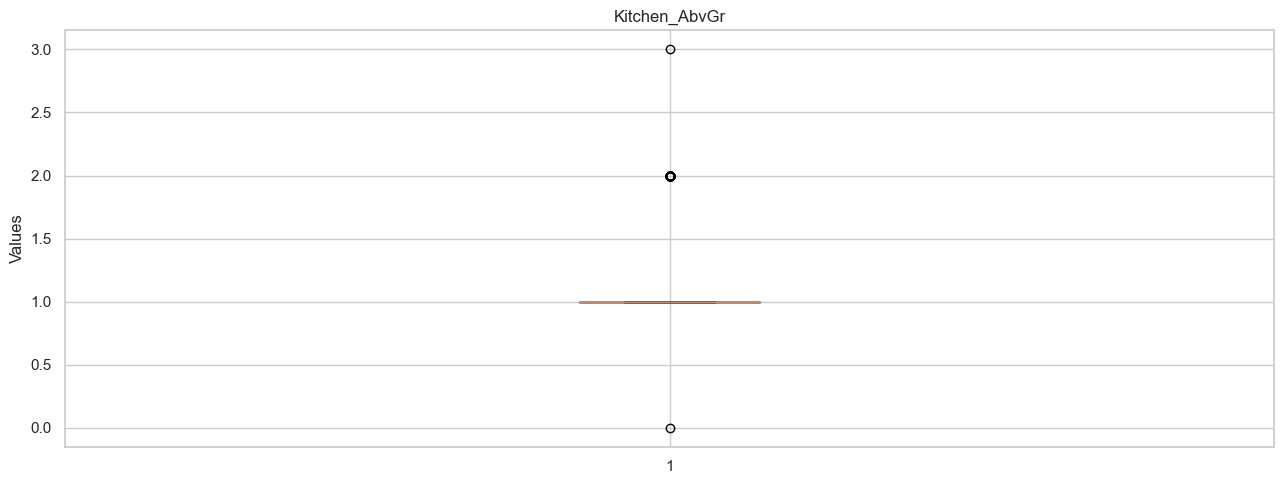

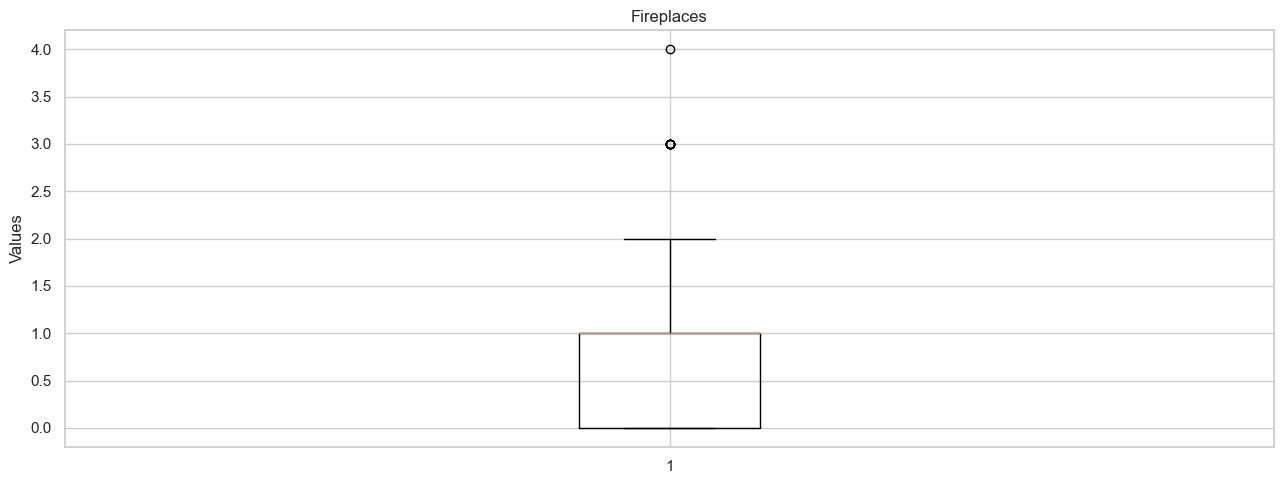

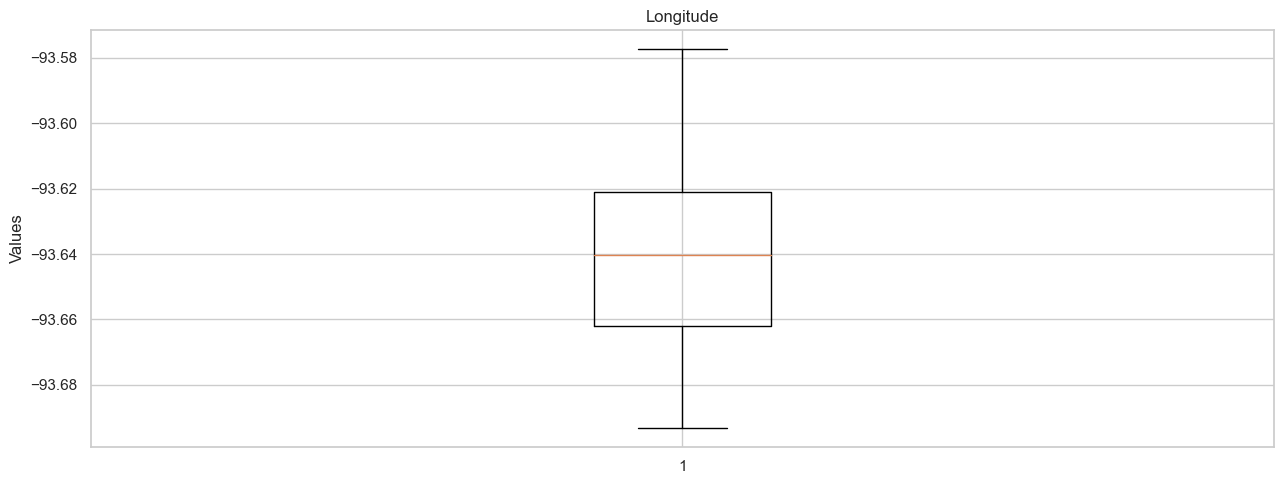

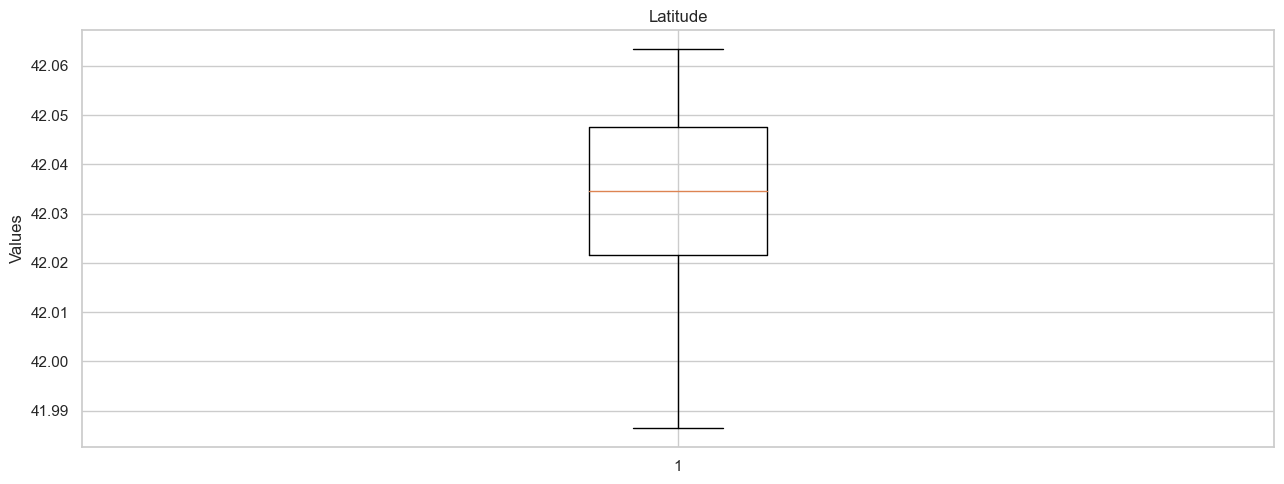

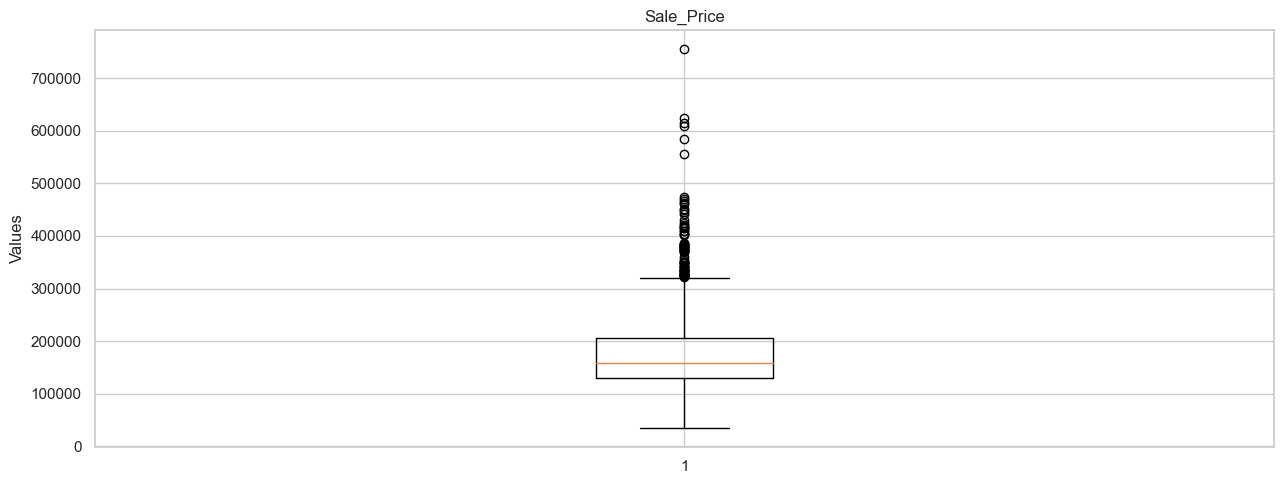

In [12]:
#Boxplot for numerical data
# Fig.8 in the report

for column in quantitative:
    plt.figure(figsize=(13, 5))
    plt.boxplot(sale_train[column])
    plt.title(column)
    plt.ylabel('Values')
    plt.tight_layout()
    plt.show()

/var/folders/h8/4k1djydx03lgnmgsnc929k6r0000gn/T/ipykernel_41708/3627070458.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(house_sale_price.corr(), cmap="Blues", annot=True,fmt='.1f')


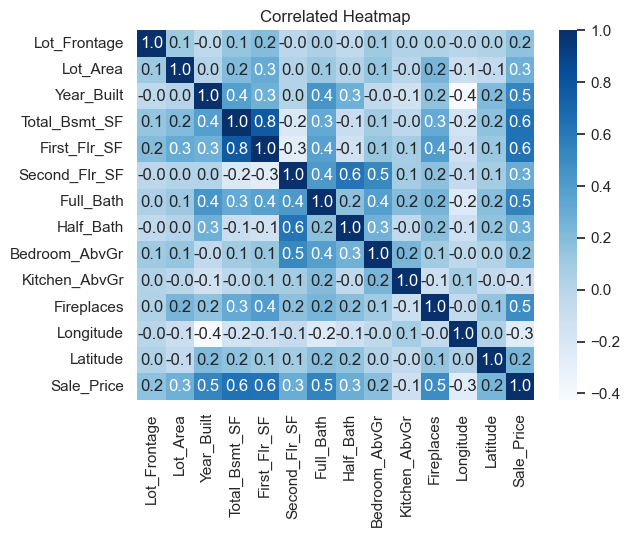

In [14]:
#Correlated Heatmap
sns.heatmap(house_sale_price.corr(), cmap="Blues", annot=True,fmt='.1f') 
plt.title('Correlated Heatmap')
plt.show()

## Data Preparation

In [15]:
x_train = sale_train.drop(columns = ['Sale_Price'], axis = 1)
y_train = sale_train['Sale_Price']

In [16]:
x_train['Longitude']=np.sin(np.radians(x_train['Longitude']))
x_train['Latitude']=np.sin(np.radians(x_train['Latitude']))

In [17]:
#Convert the categorical data into numerical data by label encoding

label_encoder = preprocessing.LabelEncoder()
for column in categorical:
    x_train[column]= label_encoder.fit_transform(x_train[column])


In [18]:
x_train.head()

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude
1469,93,11999,1,5,1,2003,4,1181,1234,1140,2,1,4,1,1,-0.997967,0.669891
509,0,17871,1,4,1,1967,4,1680,1724,0,1,1,3,1,1,-0.997992,0.669733
1050,85,9350,1,4,7,1965,2,1219,1265,0,2,0,3,1,1,-0.997997,0.669672
2364,81,8170,1,1,5,1929,2,1022,1122,549,2,0,4,1,1,-0.997980,0.669343
974,85,10625,1,0,1,2007,4,1660,1660,0,2,0,3,1,1,-0.997981,0.669807


In [19]:
#Standardized/normalised the data by min max scaler so all values lies between 0 to 1

min_max= MinMaxScaler()
min_max_train = min_max.fit_transform(x_train)
x_train = pd.DataFrame(min_max_train, columns=x_train.columns, index=x_train.index)

In [20]:
x_train.head()

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude
1469,0.465,0.065493,0.25,0.714286,0.125,0.949275,1.0,0.368372,0.258176,0.608974,0.50,0.5,0.666667,0.333333,0.25,0.662624,0.938097
509,0.000,0.101439,0.25,0.571429,0.125,0.688406,1.0,0.524017,0.398738,0.000000,0.25,0.5,0.500000,0.333333,0.25,0.466323,0.780224
1050,0.425,0.049278,0.25,0.571429,0.875,0.673913,0.5,0.380225,0.267068,0.000000,0.50,0.0,0.500000,0.333333,0.25,0.422722,0.719116
2364,0.405,0.042054,0.25,0.142857,0.625,0.413043,0.5,0.318777,0.226047,0.293269,0.50,0.0,0.666667,0.333333,0.25,0.556823,0.388877
974,0.425,0.057083,0.25,0.000000,0.125,0.978261,1.0,0.517779,0.380379,0.000000,0.50,0.0,0.500000,0.333333,0.25,0.551040,0.854295


In [1]:
#concatenate the columns to remove outliers
merge_train = pd.merge(x_train, y_train, left_index=True, right_index=True)

NameError: name 'pd' is not defined

In [22]:
quantitative

['Lot_Frontage',
 'Lot_Area',
 'Year_Built',
 'Total_Bsmt_SF',
 'First_Flr_SF',
 'Second_Flr_SF',
 'Full_Bath',
 'Half_Bath',
 'Bedroom_AbvGr',
 'Kitchen_AbvGr',
 'Fireplaces',
 'Longitude',
 'Latitude',
 'Sale_Price']

In [23]:
def remove_outliers(df, columns, threshold=1.5):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


x_train = remove_outliers(merge_train, quantitative)


x_train

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
1469,0.465,0.065493,0.25,0.714286,0.125,0.949275,1.0,0.368372,0.258176,0.608974,0.50,0.5,0.666667,0.333333,0.25,0.662624,0.938097,285000
1050,0.425,0.049278,0.25,0.571429,0.875,0.673913,0.5,0.380225,0.267068,0.000000,0.50,0.0,0.500000,0.333333,0.25,0.422722,0.719116,179900
2364,0.405,0.042054,0.25,0.142857,0.625,0.413043,0.5,0.318777,0.226047,0.293269,0.50,0.0,0.666667,0.333333,0.25,0.556823,0.388877,218000
974,0.425,0.057083,0.25,0.000000,0.125,0.978261,1.0,0.517779,0.380379,0.000000,0.50,0.0,0.500000,0.333333,0.25,0.551040,0.854295,256000
552,0.330,0.048604,0.25,0.000000,0.875,0.630435,1.0,0.308172,0.187608,0.000000,0.50,0.0,0.500000,0.333333,0.00,0.333511,0.749109,149500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2368,0.400,0.071523,0.25,0.000000,0.000,0.760870,1.0,0.446039,0.376649,0.000000,0.50,0.0,0.500000,0.333333,0.25,0.573139,0.351282,217500
1896,0.295,0.042624,0.25,0.000000,0.125,0.347826,1.0,0.315658,0.194492,0.000000,0.25,0.0,0.333333,0.333333,0.25,0.445999,0.456024,118400
2105,0.350,0.043462,0.25,0.000000,0.125,0.695652,1.0,0.328135,0.205967,0.000000,0.25,0.5,0.500000,0.333333,0.00,0.428931,0.772540,138500
1197,0.000,0.039196,0.25,0.428571,0.875,0.768116,1.0,0.140362,0.200803,0.000000,0.25,0.0,0.500000,0.333333,0.25,0.821108,0.583501,153000


In [24]:
X_train = x_train.drop(columns='Sale_Price',axis = 1)
y_train = x_train['Sale_Price']

In [25]:
#getting all the columns having value correlation greater than 0.8
cor = X_train.corr()
high_cor_columns = [cor.columns[i] for i in range(len(cor.columns)) for j in range(i) if abs(cor.iloc[i, j]) >= 0.8]
high_cor_columns

['First_Flr_SF', 'Second_Flr_SF']

In [26]:
#remove the column which is contributing less to Sale_price
X_train.drop(['Second_Flr_SF'],axis=1,inplace=True)

In [27]:
# fitting the data in OLS model
# Fig.9 in the report

x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.763e+30
Date:                Fri, 24 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:45:32   Log-Likelihood:                 32774.
No. Observations:                1574   AIC:                        -6.551e+04
Df Residuals:                    1556   BIC:                        -6.542e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Lot_Frontage    3.33e-10   3.84e-11      8.684

In [28]:
#Calculating the VIF of each columns to check multicollinearity
# Fig.10 in the report

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['variable'] = X_train.columns
# vif[vif['VIF']>5]
vif

,VIF,variable
0,1.112631,Lot_Frontage
1,1.740613,Lot_Area
2,1.603002,Bldg_Type
3,2.733922,House_Style
4,1.285298,Overall_Cond
5,2.452182,Year_Built
6,1.128140,Exter_Cond
7,4.835782,Total_Bsmt_SF
8,4.983909,First_Flr_SF
9,2.008994,Full_Bath


In [29]:
#remove the column having vif greater than 5
X_train.drop(['Kitchen_AbvGr'],axis=1,inplace=True)
X_train

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Fireplaces,Longitude,Latitude
1469,0.465,0.065493,0.25,0.714286,0.125,0.949275,1.0,0.368372,0.258176,0.50,0.5,0.666667,0.25,0.662624,0.938097
1050,0.425,0.049278,0.25,0.571429,0.875,0.673913,0.5,0.380225,0.267068,0.50,0.0,0.500000,0.25,0.422722,0.719116
2364,0.405,0.042054,0.25,0.142857,0.625,0.413043,0.5,0.318777,0.226047,0.50,0.0,0.666667,0.25,0.556823,0.388877
974,0.425,0.057083,0.25,0.000000,0.125,0.978261,1.0,0.517779,0.380379,0.50,0.0,0.500000,0.25,0.551040,0.854295
552,0.330,0.048604,0.25,0.000000,0.875,0.630435,1.0,0.308172,0.187608,0.50,0.0,0.500000,0.00,0.333511,0.749109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2368,0.400,0.071523,0.25,0.000000,0.000,0.760870,1.0,0.446039,0.376649,0.50,0.0,0.500000,0.25,0.573139,0.351282
1896,0.295,0.042624,0.25,0.000000,0.125,0.347826,1.0,0.315658,0.194492,0.25,0.0,0.333333,0.25,0.445999,0.456024
2105,0.350,0.043462,0.25,0.000000,0.125,0.695652,1.0,0.328135,0.205967,0.25,0.5,0.500000,0.00,0.428931,0.772540
1197,0.000,0.039196,0.25,0.428571,0.875,0.768116,1.0,0.140362,0.200803,0.25,0.0,0.500000,0.25,0.821108,0.583501


In [30]:
#apply same eda to test as well
# x_test.drop(['Kitchen_AbvGr'],axis=1,inplace=True)
# x_test

## Modelling

In [31]:
#apply the ols model
# Fig.11 in the report

x_train_1 = sm.add_constant(X_train)
model_1 = sm.OLS(y_train, x_train_1).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     367.4
Date:                Fri, 24 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:45:32   Log-Likelihood:                -18073.
No. Observations:                1574   AIC:                         3.618e+04
Df Residuals:                    1558   BIC:                         3.626e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.792e+04   5461.962     -5.111

In [32]:
#drop the column having p vaue greater than 0.05
x_train_1.drop(['Lot_Frontage','Bldg_Type','Exter_Cond','Latitude'],axis=1,inplace=True)
# x_test_ols_1=copy.deepcopy(x_test)

In [33]:
#drop the same column from test as well
# x_test_ols_1.drop(['Bldg_Type','Exter_Cond','Longitude'],axis=1,inplace=True)
# x_test_ols_1.columns

## Interpretation

In [34]:
#apply the same model again
# Fig.12 in the report
x_train_1 = sm.add_constant(x_train_1)
model_1 = sm.OLS(y_train, x_train_1).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     500.2
Date:                Fri, 24 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:45:32   Log-Likelihood:                -18076.
No. Observations:                1574   AIC:                         3.618e+04
Df Residuals:                    1562   BIC:                         3.624e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.486e+04   3791.561     -6.557

## Handling Test Data

In [35]:
x_test = sale_test.drop('Sale_Price',axis=1)
y_test = sale_test['Sale_Price']

In [36]:
#Convert the categorical data into numerical data by label encoding

label_encoder = preprocessing.LabelEncoder()
for column in categorical:
    x_test[column]= label_encoder.fit_transform(x_test[column])

In [37]:
#Standardized/normalised the data by min max scaler so all values lies between 0 to 1

min_max= MinMaxScaler()
min_max_test = min_max.fit_transform(x_test)
x_test = pd.DataFrame(min_max_test, columns=x_test.columns, index=x_test.index)

In [38]:
x_train_1.columns

Index(['const', 'Lot_Area', 'House_Style', 'Overall_Cond', 'Year_Built',
       'Total_Bsmt_SF', 'First_Flr_SF', 'Full_Bath', 'Half_Bath',
       'Bedroom_AbvGr', 'Fireplaces', 'Longitude'],
      dtype='object')

In [39]:
x_test = x_test[['Lot_Area', 'House_Style', 'Overall_Cond', 'Year_Built',
       'Total_Bsmt_SF', 'First_Flr_SF', 'Full_Bath', 'Half_Bath',
       'Bedroom_AbvGr', 'Fireplaces', 'Longitude']]

In [40]:
x_test_1 = sm.add_constant(x_test)

In [41]:
#getting and print the predicted value
y_pred_1=model_1.predict(x_test_1)
y_pred_1

1291    107324.847008
80      271898.376321
1107    121103.204896
578      72386.293693
2412    245017.684431
            ...      
1527    264784.015529
1319    189939.468852
165     163688.330309
893     302132.708877
2185    140843.650386
Length: 483, dtype: float64

In [42]:
y_test

1291     85000
80      362500
1107    127500
578      59000
2412    188000
         ...  
1527    215000
1319    189000
165     140750
893     272000
2185    120000
Name: Sale_Price, Length: 483, dtype: int64

## Evaluation

In [43]:
#Residual Standard Error
rse_1 = np.sqrt(np.sum((y_test - y_pred_1)**2) / (len(y_test) - 2))
rse_1

43152.76402233074

In [44]:
#Mean Absolute Error
mae_1=metrics.mean_absolute_error(y_test,y_pred_1)
mae_1

33709.345437390046

In [45]:
#Root Mean Squared Error
rmse_1=np.sqrt(metrics.mean_squared_error(y_test,y_pred_1))
rmse_1

43063.32814583274

In [46]:
##apply the linearegression model
model_2 = LinearRegression()
cv_scores = cross_val_score(model_2, x_train_1, y_train, cv=5, scoring='r2')
cv_scores

array([0.77378368, 0.75744773, 0.79763677, 0.76314928, 0.78224782])

In [47]:
# fitting the model
model_2.fit(x_train_1, y_train)
print("Coefficients:", model_2.coef_)
print("Intercept:", model_2.intercept_)

Coefficients: [     0.         306814.64711094  37635.48820144  24168.09215031
  60460.99403088 161731.66485394 129468.72562055  84501.42662661
  31557.27264252 -17322.1645119   48535.23109054   5722.96110705]
Intercept: -24861.12790512087


In [48]:
#predicted value of y
y_pred_2=model_2.predict(x_test_1)
y_pred_2

array([107324.84700754, 271898.37632065, 121103.20489626,  72386.29369312,
       245017.68443076,  83170.20287202, 120902.41264116, 165764.91316094,
       334151.35938777, 290445.13545239, 290016.13124481, 235348.24052354,
       209760.58933023, 288251.7094196 , 209036.62271391, 197860.33781144,
       123253.98822524, 283947.45008749, 246272.33453134, 173251.57359938,
       146938.08895743, 184880.86728619, 391753.67016833, 219623.76244076,
       208979.30853866, 240346.0516259 , 250663.17931449,  95506.47702081,
       231535.8095389 , 162536.37636587, 207165.27995393, 119042.62715447,
       287697.87220201, 253511.73673404, 204202.39073007, 215276.21923176,
       134087.63376532, 263214.93210809, 212555.0976124 , 317219.00607955,
       246887.27554578, 125456.05341441, 223135.01299558, 186119.78529576,
       240189.21218664, 265900.70833838, 275259.18033975, 154917.06661041,
       227019.02983363, 224536.30270147, 173422.12786643, 140448.30038593,
       206625.59684116, 2

In [49]:
#Getting the R2
r2 = r2_score(y_test, y_pred_2)
r2

0.6024921864264334

In [50]:
#Residual Standard Error
rse_2 = np.sqrt(np.sum((y_test - y_pred_2)**2) / (len(y_test) - 2))
rse_2

43152.764022330615

In [51]:
#Mean Absolute Error
mae_2=metrics.mean_absolute_error(y_test,y_pred_2)
mae_2

33709.34543738993

In [52]:
#Root Mean Squared Error
rmse_2=np.sqrt(metrics.mean_squared_error(y_test,y_pred_1))
rmse_2

43063.32814583274

In [53]:
#residual which is actual-predicted
residuals = y_test-y_pred_1
residuals

1291   -22324.847008
80      90601.623679
1107     6396.795104
578    -13386.293693
2412   -57017.684431
            ...     
1527   -49784.015529
1319     -939.468852
165    -22938.330309
893    -30132.708877
2185   -20843.650386
Length: 483, dtype: float64

## Gauss Markov assumptions

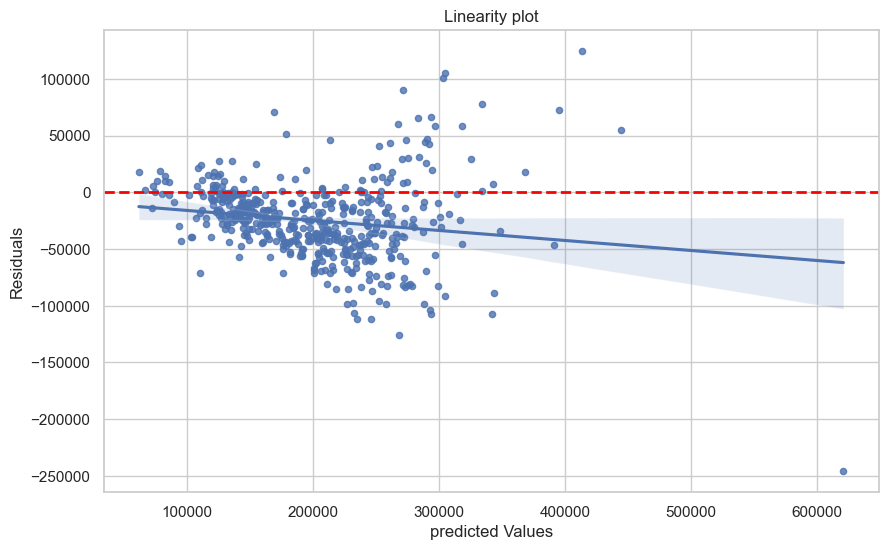

In [54]:
#check the linearity
# Fig.13 in the report

plt.figure(figsize=(10, 6))
sns.regplot(x= y_pred_1, y=residuals, scatter_kws={"s": 20})
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Linearity plot')
plt.xlabel('predicted Values')
plt.ylabel('Residuals')
plt.show()

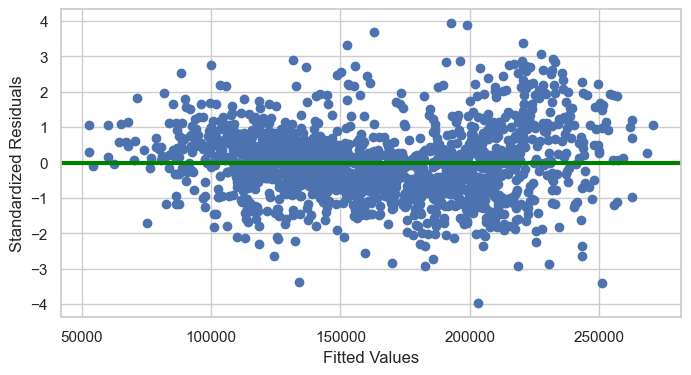

In [55]:
#checking the homosedacity by graphical method
# Fig.14 in the report

standardized_residuals = model_1.get_influence().resid_studentized_internal
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(model_1.fittedvalues, standardized_residuals)
ax.axhline(y=0, color='green', linestyle='-', linewidth=3)
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Standardized Residuals')
plt.show()

In [56]:
#checking the homosedacity by stats method
residuals = model_1.resid
_, p_value, _, _ = het_breuschpagan(residuals, x_train_1)
print(f'p-value: {p_value}')
if p_value < 0.05:
    print('Heteroscedasticity')
else:
    print('Homoscedasticity')

p-value: 3.1275401346970245e-29
Heteroscedasticity


In [57]:
#checking the autocorelation between errors 
durbin_watson = sm.stats.stattools.durbin_watson(model_1.resid)
print(durbin_watson)
if durbin_watson < 1.5 or durbin_watson> 2.5:
    print('significant autocorrelation')
else:
    print('No significant autocorrelation')

1.9978928053707912
No significant autocorrelation


In [58]:
#checking the influencial observations
ols_influence = OLSInfluence(model_1)
cook_distance = ols_influence.cooks_distance[0]
cook_distance

1469    1.383542e-03
1050    2.022170e-03
2364    4.814439e-03
974     2.620854e-04
552     1.343943e-04
            ...     
2368    1.344814e-05
1896    1.696457e-08
2105    2.708480e-05
1197    5.260919e-05
148     6.293864e-05
Length: 1574, dtype: float64

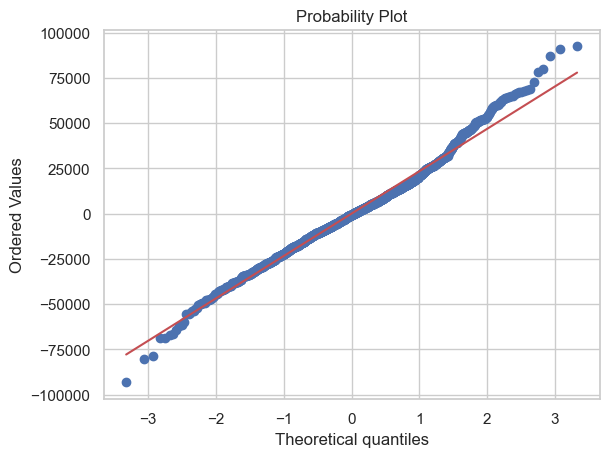

In [59]:
#checking the normality by graphical method
# Fig.15 in the report

stats.probplot(residuals,dist='norm',plot=plt)
plt.show()

In [60]:
#checking the normality by statistical approach
statistic, p_value = shapiro(residuals)
print(f"Statistic: {statistic}, p-value: {p_value}")
if p_value > 0.05:
    print("Normally distributed")
else:
    print("Not normally distributed")

Statistic: 0.9879913330078125, p-value: 3.952942140283966e-10
Not normally distributed
